# 多尺度目标检测
对每个像素进行锚框建模的代价可能是非常大的，例如512*512的图片，我们如果要生成五个锚框的话(也就是3个s三个r)，需要生成512*512*5 = 1,310,720个锚框。

## 多尺度锚框
减少图像上的锚框可能是比较简单的一种做法，例如可以Pooling，或者以2*4,1*4等尺度生成锚框，当检测较小的物体时候我们可以采样更多区域，当采样较大的物体的时候，我们采样更少区域

In [10]:
import sys
sys.path.append("../")
import torch as t
from pltutils import *


In [11]:
img = plt.imread("../figures/cat.jpg")
print(img.shape)

w,h = img.shape[0],img.shape[1]


(663, 575, 3)


In [18]:
def display_anchors(fmap_w,fmap_h,s):
    set_figsize()
    
    fmap = t.zeros((1,10,fmap_h,fmap_w))
    anchors = multibox_prior(fmap,sizes=s,ratios = [1,2,0.5])
    bbox_scale = t.tensor((w,h,w,h))
    show_bboxes(plt.imshow(img).axes,anchors[0]*bbox_scale)


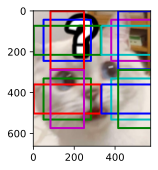

In [24]:
display_anchors(fmap_w=2, fmap_h=2, s=[0.35])


# 多尺度检测
基于CNN的多尺度目标检测算法

假设我们有$c$张形状为$h \times w$的特征图，使用之前的方法生成了$hw$组锚框，其中每组都有$a$个中心相同的锚框，每个锚框都根据真实值边界框都标记了类别和偏移量。在当前的尺度下，目标检测模型需要预测输入图像上$hw$组锚框类别和偏移量，而且不同组锚框具有不同的中心。

$c$张特征图可以看做CNN的正向传播算法获得的中间输出，既然每张特征图上都有$hw$个不同的空间位置，那么相同空间位置可以看做含有c个单元。可以将特征图同一空间位置的c个单元变换为使用此空间位置生成的a个锚框类别和偏移量。